<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-deep-learning/blob/main/ReadImages_ShowImageChannels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from PIL import Image
import os

In [ ]:
# List all image files in the folder
image_folder = "/content/drive/MyDrive/images/images280x280"
image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.png', '.jpg', '.jpeg'))]
num_images = len(image_files)                       # Number of images
channel_number=3                                    # Number of iamge channels
print(num_images)

4


In [ ]:
# Open and process images
images = []
for image_file in image_files[:num_images]:
    img = Image.open(image_file)
    img = img.resize((280, 280))
    img = img.convert('RGB')
    images.append(np.array(img))
print(images[1])

[[[ 47  30  20]
  [ 47  30  20]
  [ 47  30  20]
  ...
  [135 118 110]
  [138 121 113]
  [141 124 116]]

 [[ 47  30  20]
  [ 47  30  20]
  [ 47  30  20]
  ...
  [137 120 112]
  [141 124 116]
  [143 126 118]]

 [[ 47  30  20]
  [ 47  30  20]
  [ 47  30  20]
  ...
  [140 123 115]
  [144 127 119]
  [148 131 123]]

 ...

 [[ 39  20   6]
  [ 38  20   6]
  [ 39  20   6]
  ...
  [ 42  18   6]
  [ 44  17   6]
  [ 42  18   6]]

 [[ 36  18   6]
  [ 35  19   6]
  [ 35  17   5]
  ...
  [ 39  17   4]
  [ 40  16   4]
  [ 39  17   4]]

 [[ 35  19   6]
  [ 35  19   6]
  [ 34  18   5]
  ...
  [ 38  16   3]
  [ 38  16   3]
  [ 38  16   3]]]


In [ ]:
# Converting a list of images to a NumPy array
dataset = np.array(images, dtype=np.float32) / 255.0              # Normalize values ​​to the interval [0, 1]

# Convert to TensorFlow
input_data = tf.convert_to_tensor(dataset)
print(input_data.shape)

(4, 280, 280, 3)


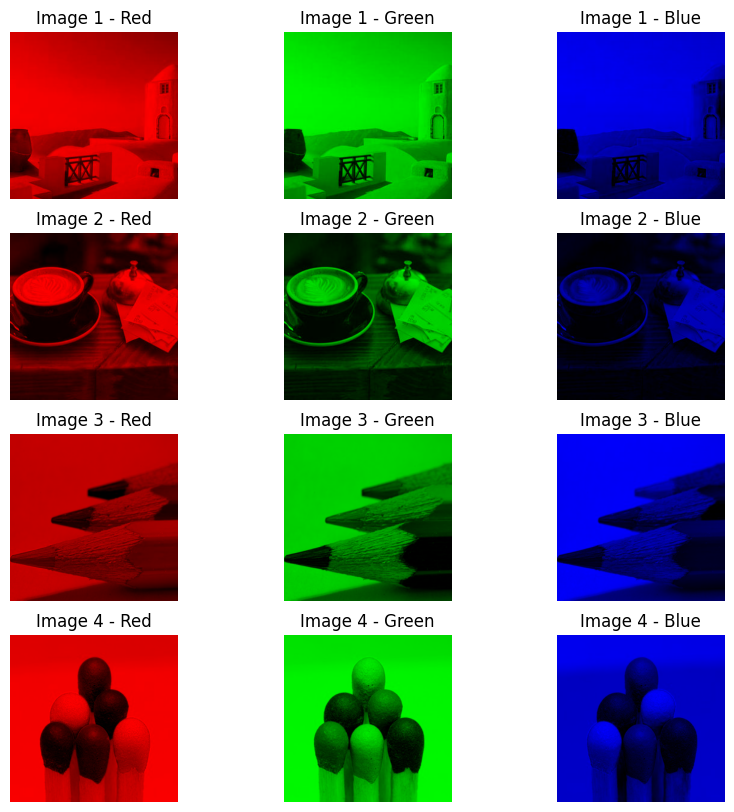

In [ ]:
# Display the three color channels of the first image.
fig, axes = plt.subplots(num_images, channel_number, figsize=(10, 10))
for i in range(num_images):
    for channel_index in range(channel_number):
        data = np.zeros_like(input_data[0].numpy())
        data[:, :, channel_index] = input_data[i, :, :, channel_index]
        ax = axes[i, channel_index]
        ax.imshow(data)
        ax.set_title(f"Image {i + 1} - {['Red', 'Green', 'Blue'][channel_index]}")
        ax.axis('off')
plt.show()